### Studio del comportamento del ENC in funzione delle capacità $C_D$ con soglia ~1000e e $I_{LDAC}$ ~ $14 \mu A$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.patches as mpatches

In [2]:
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

In [3]:
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_0_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_50_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_100_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_150_soglia_1500_elettroni_I_LDAC_14_0.txt


In [4]:
data = parseCalibs(button.files) #estrapolo i dati dei file di configurazione

4 dataframe crated!


In [5]:
capac = [0.0, 50.0, 100.0, 150.0]

In [6]:
def getErrorFunctionSigma(dataframe, tipo):
    data = []    
    for i in dataframe:
        filtered_type = i[0].loc[(i[0]['Tipo'] == tipo)] ###attenzione!!
        sigmas = filtered_type['ErrFunSigma'].values.tolist()
        data.append(sigmas)
    return data

In [7]:
sigmasA = getErrorFunctionSigma(data, "A")
sigmasB = getErrorFunctionSigma(data, "B")

In [8]:
ENC_B = []
for i in sigmasB:
    ENC_B.append(np.mean(np.asarray(i)))

In [9]:
#converto in elettroni
ENC_B = [x*50 for x in ENC_B]
ENC_B

[66.99107142857143, 86.58928571428571, 107.79464285714285, 130.1875]

In [10]:
ENC_A = []
for i in sigmasA:
    ENC_A.append(np.mean(np.asarray(i)))

In [11]:
#converto in elettroni
ENC_A = [x*50 for x in ENC_A]
ENC_A

[67.35039370078741, 84.74409448818898, 104.44881889763779, 124.32283464566933]

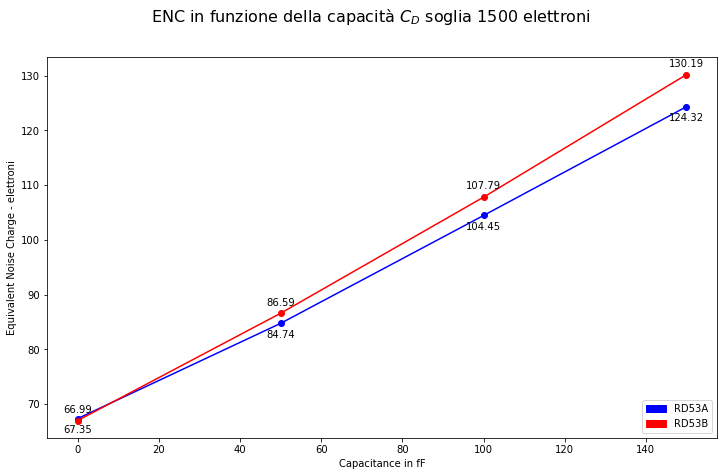

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(capac, ENC_A, '-o', color ="blue")
ax.plot(capac, ENC_B, '-o', color = "red")
ax.set_xlabel("Capacitance in fF")
ax.set_ylabel("Equivalent Noise Charge - elettroni")

blue_patch = mpatches.Patch(color='blue', label="RD53A")
red_patch = mpatches.Patch(color='red', label="RD53B")

ax.legend(loc="lower right", handles=[blue_patch, red_patch])

for i, txt in enumerate(ENC_A):        
    ax.annotate(round(txt,2), #text
                (capac[i], ENC_A[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,-14), #txt distance from the point
               ha='center') #horizontal alignment
    

for i, txt in enumerate(ENC_B):  
    ax.annotate(round(txt,2), #text
                (capac[i], ENC_B[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,8), #txt distance from the point
               ha='center') #horizontal alignment
fig.suptitle("ENC in funzione della capacità $C_D$ soglia 1500 elettroni", fontsize=16)

#plt.savefig('ENC in funzione delle CD soglia 1500 elettroni.png', bbox_inches='tight')

plt.show()

   

In [13]:
dev_B = []
for i in sigmasB:
    dev_B.append(50*np.std(np.asarray(i)))
dev_B

[10.668918086561312, 11.788541327605087, 12.803207182505611, 24.29369452656388]

In [14]:
dev_A = []
for i in sigmasA:
    dev_A.append(50*np.std(np.asarray(i)))

dev_A

[11.6291642208252, 9.559977708464992, 11.935165180940556, 17.438138982626054]

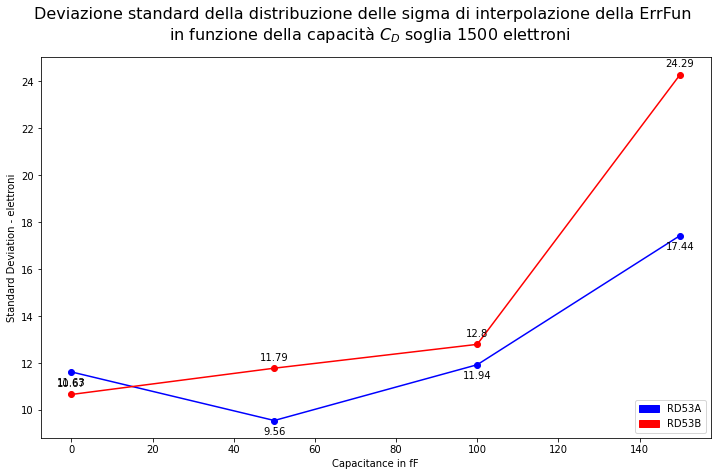

In [23]:
fig1, ax1 = plt.subplots(1,1, figsize=(12,7))

ax1.plot(capac, dev_A, '-o', color ="blue")
ax1.plot(capac, dev_B, '-o', color = "red")
ax1.set_xlabel("Capacitance in fF")
ax1.set_ylabel("Standard Deviation - elettroni")

blue_patch = mpatches.Patch(color='blue', label="RD53A")
red_patch = mpatches.Patch(color='red', label="RD53B")

ax1.legend(loc="lower right", handles=[blue_patch, red_patch])

for i, txt in enumerate(dev_A):        
    ax1.annotate(round(txt,2), #text
                (capac[i], dev_A[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,-14), #txt distance from the point
               ha='center') #horizontal alignment
    

for i, txt in enumerate(dev_B):  
    ax1.annotate(round(txt,2), #text
                (capac[i], dev_B[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,8), #txt distance from the point
               ha='center') #horizontal alignment
fig1.suptitle("Deviazione standard della distribuzione delle sigma di interpolazione della ErrFun \n  in funzione della capacità $C_D$ soglia 1500 elettroni", fontsize=16)

plt.savefig('DevStd delle sigma ErrFun in funzione delle CD soglia 1500 elettroni.png', bbox_inches='tight')

plt.show()